In [43]:
import cv2 # 导入opencv
import numpy as np
import matplotlib.pyplot as plt
# 魔法方法，使图片内嵌于jupyter notebook
%matplotlib inline

In [44]:
# 定义函数实现图片可视化
def look_img(img):
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # imread读入的图片是bgr形式，需要转换为rgb
    plt.imshow(img_RGB)
    plt.show()

## 导入预训练好的YOLOv3模型

In [45]:
# weights = "yolov3-spp.weights"
# config_file = "yolov3-spp.cfg"
weights = "yolov3.weights" # 权重
config_file = "yolov3.cfg" # 网络名
net = cv2.dnn.readNet(weights,config_file)

In [46]:
with open('coco.names','r')as f:
    classes = f.read().splitlines()

In [47]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [48]:
img = cv2.imread('images/test3.jpg')

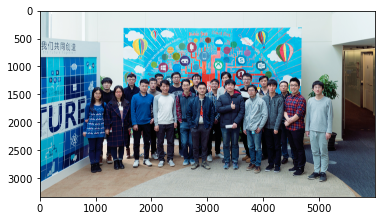

In [49]:
look_img(img)

In [50]:
img.shape

(3337, 6000, 3)

In [51]:
height,width,_ = img.shape

In [52]:
blob = cv2.dnn.blobFromImage(img,1/255,(416,416),(0,0,0),swapRB=True,crop=False)

In [53]:
blob.shape

(1, 3, 416, 416)

In [54]:
net.setInput(blob)

In [55]:
net.getLayerNames()

['conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [56]:
# 获得某一层的权重
net.getParam('conv_14')

array([[[[ 3.27632949e-03,  3.58983269e-03,  7.96814170e-03],
         [-2.33247131e-03,  8.38194333e-04,  6.78776577e-03],
         [ 3.38377338e-03, -3.66071530e-04, -4.17629170e-04]],

        [[-9.87819396e-04,  4.09887347e-04,  2.78109452e-03],
         [-2.41828104e-03,  1.81409516e-04,  6.41859276e-03],
         [-2.60787830e-03, -5.41859446e-03, -4.50126734e-03]],

        [[ 6.01914478e-04,  1.19895637e-02,  2.18996080e-03],
         [ 3.43640626e-04,  4.22691070e-02, -6.23071427e-03],
         [ 7.74426386e-03,  2.07966156e-02, -2.05145311e-03]],

        ...,

        [[ 1.17751546e-02,  1.45143166e-03, -3.03199631e-03],
         [ 6.38273172e-03,  1.69926416e-02, -1.06412284e-02],
         [ 2.76631094e-03,  4.18494176e-03, -1.28041059e-02]],

        [[ 5.88300498e-03, -1.36170464e-04, -5.71771245e-03],
         [ 7.97629543e-03,  9.18875448e-03,  3.15103773e-03],
         [-1.26038550e-03,  2.17503472e-03,  4.05987870e-04]],

        [[ 6.52012229e-03,  4.50877473e-03,  5

In [57]:
# 获得三个输出层的索引号
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [58]:
layersNames = net.getLayerNames()
output_layers_names = [layersNames[i[0]-1]for i in net.getUnconnectedOutLayers()]
output_layers_names

['yolo_82', 'yolo_94', 'yolo_106']

In [59]:
# 前向推断
prediction = net.forward(output_layers_names)

In [60]:
len(prediction)

3

In [61]:
for i in range(len(prediction)):
    print(prediction[i].shape)

(507, 85)
(2028, 85)
(8112, 85)


$13 \times 13 \times 3 = 507 $ \
$26 \times 26 \times 3 = 2028 $ \
$52 \times 52 \times 3 = 8112 $ \
85 = 4(x,y,w,h) + 1(obj) + 80(coco分类种类)

In [62]:
# 查看第二个尺度索引为99的框的85维向量
prediction[1][99]

array([2.9147232e-01, 5.1704183e-02, 6.9923244e-02, 1.1221142e-01,
       7.4640093e-06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

## 从三个尺度输出结果中解析所有预测框的信息

In [63]:
# 存放预测框的坐标
boxes = []

# 存放(有无物体)置信度
objectess = []

# 存放类别概率
class_probs = []

# 存放预测框类别的索引号
class_ids = []

# 存放预测框类别名称
class_names = []

In [64]:
for scale in prediction: # 遍历三种尺度
    for bbox in scale: # 遍历该种尺度每个预测框
        obj  = bbox[4] # 该预测框的置信度confidence
        class_scores = bbox[5:] # 80种类别的预测概率
        class_id = np.argmax(class_scores) # 取其中的最大值为该bbox的预测类别
        class_name = classes[class_id]
        class_prob = class_scores[class_id]

        # 获取预测框中心点坐标、预测框宽高
        center_x = int(bbox[0]*width)
        center_y = int(bbox[1]*height)
        w = int(bbox[2]*width)
        h = int(bbox[3]*height)
        # 预测框左上角坐标
        x = int(center_x - w/2)
        y = int(center_y - h/2)

        boxes.append([x,y,w,h])
        objectess.append(float(obj))
        class_ids.append(class_id)
        class_names.append(class_name)
        class_probs.append(class_prob)

In [65]:
boxes

[[-979, -71, 2384, 473],
 [-678, -1189, 1840, 2575],
 [-2112, -1266, 4761, 2775],
 [31, -9, 1501, 457],
 [-129, -874, 1736, 1946],
 [-1626, -1208, 4782, 2687],
 [49, -26, 2139, 428],
 [123, -813, 2141, 1856],
 [-1323, -1134, 5054, 2554],
 [81, -31, 3028, 373],
 [382, -782, 2444, 1808],
 [-949, -1100, 5183, 2475],
 [539, -33, 3155, 361],
 [846, -804, 2601, 1838],
 [-449, -1114, 5235, 2454],
 [684, -9, 3621, 337],
 [1231, -838, 2615, 1900],
 [-119, -1029, 5409, 2310],
 [1037, -6, 3898, 346],
 [1741, -866, 2568, 1948],
 [250, -1044, 5599, 2354],
 [1685, 0, 3585, 341],
 [2238, -774, 2507, 1792],
 [687, -1001, 5499, 2268],
 [2649, -22, 2555, 359],
 [2773, -797, 2331, 1879],
 [1531, -1016, 4759, 2302],
 [3202, -15, 2397, 365],
 [3286, -733, 2301, 1773],
 [2216, -989, 4391, 2272],
 [3884, -14, 1961, 402],
 [3717, -837, 2159, 1945],
 [2473, -1067, 4724, 2407],
 [4450, 0, 1590, 431],
 [4373, -886, 1837, 1991],
 [3157, -1010, 4373, 2288],
 [4679, -62, 2147, 469],
 [4911, -1116, 1761, 2450],
 [32

In [66]:
len(boxes)

10647

In [67]:
len(objectess)

10647

In [68]:
confidences = np.array(class_probs)*np.array(objectess) # obj*class_score

In [69]:
len(confidences)

10647

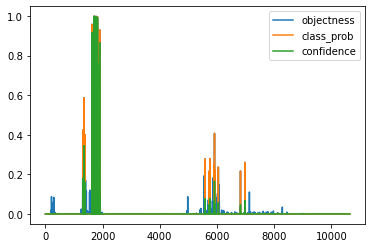

In [70]:
plt.plot(objectess, label = 'objectness')
plt.plot(class_probs, label='class_prob')
plt.plot(confidences,label='confidence')
plt.legend()
plt.show()

### 置信度阈值过滤+NMS

In [71]:
CONF_THRES = 0.1
NMS_THRES = 0.4

In [72]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,CONF_THRES,NMS_THRES)

In [73]:
# 最终留下的预测框的索引号
indexes.flatten()

array([1700, 1706, 1769, 1820, 1805, 1736, 1733, 1775, 1721, 1712, 1715,
       1353, 1308, 5914, 1380], dtype=int32)

In [74]:
len(indexes.flatten())

15

In [75]:
# 随机给每一个预测框生成一种颜色
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [76]:
# 遍历留下的每一个预测框，可视化
for i in indexes.flatten():
    # 获取坐标与置信度
    x, y, w, h = boxes[i]
    confidence = str(round(confidences[i],2))
    # 获取颜色，画框
    color = colors[i % len(colors)]
    cv2.rectangle(img,(x,y),(w+x,h+y),color,8) # 图片，左上坐标，右下坐标，颜色，框的粗细
    # 写上类别名称与置信度
    string = '{} {}'.format(class_names[i],confidence)
    # 图片，文字，左上坐标，字体，字体大小，颜色，字体粗细
    cv2.putText(img,string,(x,y+20),cv2.FONT_HERSHEY_SIMPLEX,3,(255,255,255),3)
    print(x,y,w,h,confidence,class_names[i])

1605 1190 438 1623 1.0 person
2030 1170 429 1656 1.0 person
732 1370 516 1520 1.0 person
4724 1191 565 1849 0.99 person
3605 1258 435 1648 0.99 person
4368 1115 408 1830 0.98 person
4017 1100 336 1853 0.98 person
1145 1325 526 1529 0.97 person
3169 1201 423 1627 0.97 person
2443 1212 325 1557 0.94 person
2688 1229 472 1590 0.87 person
4935 1143 413 470 0.34 pottedplant
1481 1160 313 433 0.18 person
3893 1168 200 386 0.17 person
1037 1210 308 503 0.16 person


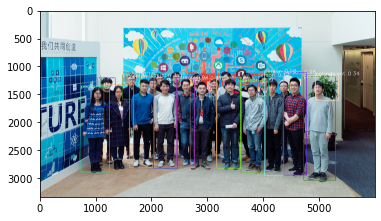

In [77]:
look_img(img)

In [78]:
cv2.imwrite('images/result3.jpg',img)
# cv2.imwrite('result_spp.jpg',img)

True